In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

df = pd.read_csv('../data/interim/cleaned_pbp_data.csv')
try:
    df = df.drop('Unnamed: 0',axis=1)
except:
    pass

# Score Diff
df['Home_Score_Diff'] = df['Home_Team_LiveScore'] - df['Away_Team_LiveScore']

# Time left in game
# EXISTS ALREADY

In [2]:
# Which Team Won 1/0
game_list = list(set(df['game.gameId']))

final_df = pd.DataFrame(columns=['gameId','Home_Win'])
for game in game_list:
    cut_df = df[df['game.gameId']==game]
    cut_df = cut_df.sort_values(by='seconds_left_in_game',ascending=True)
    cut_df = cut_df.reset_index()
    
    final_score_diff = cut_df['Home_Score_Diff'].iat[0]
    
    if final_score_diff>=0:
        home_win = 1
    else:
        home_win = 0
        
    final_df.loc[len(final_df.index)] = [game, home_win]

    
print(final_df)

df = df.merge(final_df,how='left',left_on = 'game.gameId', right_on='gameId')
    
df = df.drop('gameId',axis=1)

                      gameId  Home_Win
0   5bd01c82aeda71993987c6a4         1
1   5bd04586aeda719939d236e6         0
2   5bd02bbdaeda719939a79992         1
3   5bd06405aeda7199391283ea         0
4   5bd05bd0aeda71993902327e         0
5   5bd033f3aeda719939b4ed3a         1
6   5bd01a2baeda7199397df4dc         1
7   5bd02bbdaeda719939a79977         0
8   5bd055f4aeda719939f6e160         0
9   5bd02006aeda7199398f037a         0
10  5bd0364aaeda719939b90a1a         1
11  5bd05cfcaeda71993904d635         1
12  5bd069e0aeda7199391dfed9         0
13  5bd02006aeda7199398f0395         1
14  5bd0364aaeda719939b90a32         0
15  5bd05720aeda719939f90abf         1
16  5bd02bbdaeda719939a7998f         1
17  5bd04586aeda719939d2369c         1
18  5bd01c82aeda71993987c69f         1
19  5bd02bbdaeda719939a7997a         1
20  5bd0364aaeda719939b90a24         1
21  5bd04203aeda719939caccd5         1
22  5bd05cfcaeda71993904d639         1
23  5bd02006aeda7199398f0376         1
24  5bd01c82aeda71993987c

In [3]:
# Team PPP so far
df['Home_PPP'] = 0
df['Away_PPP'] = 0

final_df = pd.DataFrame()

game_list = list(set(df['game.gameId']))


for game in game_list:
    poss_id_list = []
    poss_count = 0
    
    cut_df = df[df['game.gameId']==game]
    cut_df = cut_df.sort_values(by='seconds_left_in_game',ascending=False)
    cut_df = cut_df.reset_index()

    for idx,row in cut_df.iterrows():
        if row['possessionId'] in poss_id_list:
            pass
        else:
            poss_count = poss_count + 1

        home_ppp = round(row['Home_Team_LiveScore'] / (poss_count/3),2)
        away_ppp = round(row['Away_Team_LiveScore'] / (poss_count/3),2)
        
        print(poss_count)
        
        cut_df.at[idx,'Home_PPP'] = home_ppp
        cut_df.at[idx,'Away_PPP'] = away_ppp
    
    
    final_df = pd.concat([final_df,cut_df])
    

final_df = final_df.reset_index()
final_df = final_df.drop('index',axis=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
5

In [4]:
df.head()

,playByPlayId,game.awayTeam.fullName,game.awayTeam.awayTeamId,game.homeTeam.fullName,game.homeTeam.homeTeamId,defense.teamId,defense.name,offense.teamId,offense.name,game.gameId,game.date,clock,ato,eob,shot,sob,zone,possessionId,oPlayer.name,dPlayer.name,prPlayer.name,gameHalf,shotClock,homeEvent,turnover,offensiveString,secondaryString,ftAttempt,ftMade,Off_Lineup,Def_Lineup,Shot,Shooter,TOV,TOV_Player,PF,PF_Player,DREB,OREB,AST,STL,BLK,DREB_Player,OREB_Player,AST_Player,STL_Player,BLK_Player,FTA,FT_Made,FT_Miss,3PA,3P_Made,3P_Miss,2PA,2P_Made,2P_Miss,Open_Shot,High P&R,ISO,Transition,Post-Up,Spot-Up,Cut,Flash,seconds_left_in_game,seconds_into_game,Home_Team_LiveScore,Away_Team_LiveScore,Possession_Value,Home_Score_Diff,Home_Win,Home_PPP,Away_PPP
0,5c7b7ff685d07ba97689e591,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11820,False,True,406,False,False,5c7b7ff785d07ba97689e812,Kouat Noi,NaN,Kouat Noi,1,False,True,False,12 Kouat Noi > Cut > Screen > Miss 2 Pts,Shot > Kouat Noi > Any Type > 2 Point Attempt ...,0,0,"['Alex Robinson', 'Desmond Bane', 'JD Miller',...","['Davide Moretti', 'Jarrett Culver', 'Matt Moo...",1.0,Kouat Noi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,2382,0,0,0,0,0,0,0,0
1,5c7b7ff685d07ba97689e592,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11820,False,True,406,False,False,5c7b7ff785d07ba97689e812,Kouat Noi,NaN,Tariq Owens,1,False,True,False,12 Kouat Noi > Cut > Screen > Miss 2 Pts,Misc Stat > Defensive Rebound > Tariq Owens,0,0,"['Alex Robinson', 'Desmond Bane', 'JD Miller',...","['Davide Moretti', 'Jarrett Culver', 'Matt Moo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,2382,0,0,0,0,0,0,0,0
2,5c7b7ff685d07ba97689e594,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfea0,TCU,54457dd3300969b132fcfead,TexasTech,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11530,True,False,0,False,False,5c7b7ff785d07ba97689e789,Davide Moretti,Alex Robinson,Alex Robinson,1,True,False,True,25 Davide Moretti > P&R Ball Handler > Left P&...,Misc Stat > Steal > Alex Robinson,0,0,"['Davide Moretti', 'Jarrett Culver', 'Matt Moo...","['Alex Robinson', 'Desmond Bane', 'JD Miller',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2353,29,0,0,0,0,0,0,0
3,5c7b7ff685d07ba97689e593,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfea0,TCU,54457dd3300969b132fcfead,TexasTech,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11530,True,False,0,False,False,5c7b7ff785d07ba97689e789,Davide Moretti,Alex Robinson,Davide Moretti,1,True,False,True,25 Davide Moretti > P&R Ball Handler > Left P&...,Turnover > Any Type > Davide Moretti,0,0,"['Davide Moretti', 'Jarrett Culver', 'Matt Moo...","['Alex Robinson', 'Desmond Bane', 'JD Miller',...",NaN,NaN,1.0,Davide Moretti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2353,29,0,0,0,0,0,0,0
4,5c7b7ff685d07ba97689e598,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11340,False,False,430,False,False,5c7b7ff785d07ba97689e815,JD Miller,Davide Moretti,JD Miller,1,False,True,False,21 Kevin Samuel > Post-Up > Right Block > Defe...,Shot > JD Miller > Any Type > 2 Point Attempt ...,0,0,"['Alex Robinson', '

In [5]:
#LogReg fitting, and diagnostics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
import os, sys
import time
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option('display.max_columns',200) #allows for up to 500 columns to be displayed when viewing a dataframe
pd.set_option('display.max_rows',100)

import pickle

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
plt.style.use('seaborn-white')



X = df[['Home_Score_Diff','seconds_left_in_game','Home_PPP','Away_PPP']]
y = df['Home_Win']

win_prob_logr = LogisticRegression()
win_prob_logr.fit(X, y)

print(f'MVP Model Score: {round(win_prob_logr.score(X, y)*100,2)}%')

MVP Model Score: 79.19%


In [6]:
y_pred_proba = win_prob_logr.predict_proba(X)
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba.columns=['DROP','home_win_prob']
y_pred_proba = y_pred_proba.drop('DROP',axis=1)

In [7]:
df['Home_Team_Win_Probability'] = y_pred_proba

df.to_csv('../data/interim/cleaned_pbp_data_win_probability_added.csv')

In [8]:
df.head()

,playByPlayId,game.awayTeam.fullName,game.awayTeam.awayTeamId,game.homeTeam.fullName,game.homeTeam.homeTeamId,defense.teamId,defense.name,offense.teamId,offense.name,game.gameId,game.date,clock,ato,eob,shot,sob,zone,possessionId,oPlayer.name,dPlayer.name,prPlayer.name,gameHalf,shotClock,homeEvent,turnover,offensiveString,secondaryString,ftAttempt,ftMade,Off_Lineup,Def_Lineup,Shot,Shooter,TOV,TOV_Player,PF,PF_Player,DREB,OREB,AST,STL,BLK,DREB_Player,OREB_Player,AST_Player,STL_Player,BLK_Player,FTA,FT_Made,FT_Miss,3PA,3P_Made,3P_Miss,2PA,2P_Made,2P_Miss,Open_Shot,High P&R,ISO,Transition,Post-Up,Spot-Up,Cut,Flash,seconds_left_in_game,seconds_into_game,Home_Team_LiveScore,Away_Team_LiveScore,Possession_Value,Home_Score_Diff,Home_Win,Home_PPP,Away_PPP,Home_Team_Win_Probability
0,5c7b7ff685d07ba97689e591,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11820,False,True,406,False,False,5c7b7ff785d07ba97689e812,Kouat Noi,NaN,Kouat Noi,1,False,True,False,12 Kouat Noi > Cut > Screen > Miss 2 Pts,Shot > Kouat Noi > Any Type > 2 Point Attempt ...,0,0,"['Alex Robinson', 'Desmond Bane', 'JD Miller',...","['Davide Moretti', 'Jarrett Culver', 'Matt Moo...",1.0,Kouat Noi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,2382,0,0,0,0,0,0,0,0,0.614218
1,5c7b7ff685d07ba97689e592,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11820,False,True,406,False,False,5c7b7ff785d07ba97689e812,Kouat Noi,NaN,Tariq Owens,1,False,True,False,12 Kouat Noi > Cut > Screen > Miss 2 Pts,Misc Stat > Defensive Rebound > Tariq Owens,0,0,"['Alex Robinson', 'Desmond Bane', 'JD Miller',...","['Davide Moretti', 'Jarrett Culver', 'Matt Moo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,2382,0,0,0,0,0,0,0,0,0.614218
2,5c7b7ff685d07ba97689e594,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfea0,TCU,54457dd3300969b132fcfead,TexasTech,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11530,True,False,0,False,False,5c7b7ff785d07ba97689e789,Davide Moretti,Alex Robinson,Alex Robinson,1,True,False,True,25 Davide Moretti > P&R Ball Handler > Left P&...,Misc Stat > Steal > Alex Robinson,0,0,"['Davide Moretti', 'Jarrett Culver', 'Matt Moo...","['Alex Robinson', 'Desmond Bane', 'JD Miller',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2353,29,0,0,0,0,0,0,0,0.613922
3,5c7b7ff685d07ba97689e593,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfea0,TCU,54457dd3300969b132fcfead,TexasTech,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11530,True,False,0,False,False,5c7b7ff785d07ba97689e789,Davide Moretti,Alex Robinson,Davide Moretti,1,True,False,True,25 Davide Moretti > P&R Ball Handler > Left P&...,Turnover > Any Type > Davide Moretti,0,0,"['Davide Moretti', 'Jarrett Culver', 'Matt Moo...","['Alex Robinson', 'Desmond Bane', 'JD Miller',...",NaN,NaN,1.0,Davide Moretti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2353,29,0,0,0,0,0,0,0,0.613922
4,5c7b7ff685d07ba97689e598,Texas Tech Red Raiders,54457dd3300969b132fcfead,TCU Horned Frogs,54457dd3300969b132fcfea0,54457dd3300969b132fcfead,TexasTech,54457dd3300969b132fcfea0,TCU,5bd05bd0aeda71993902327e,2019-03-02T00:00:00.000Z,11340,False,False,430,False,False,5c7b7ff785d07ba97689e815,JD Miller,Davide Moretti,JD Miller,1,False,True,False,21 Kevin Samuel > Post-Up > Right Block > Defe...,Shot > JD Mi

In [9]:
def get_color(team_name):
    color_df = pd.read_csv('../data/interim/color_df.csv')
    team_name = team_name.strip()
    color_df = color_df[color_df['team_name']==team_name]
    color_df = color_df.reset_index()
    color = color_df['color'].iat[0]
    return color

def plot_game_flow_chart(df,game_id,filename,shade=True):

    cut_df = df[df['game.gameId']==game_id]
    cut_df = cut_df.sort_values(by='seconds_left_in_game',ascending=False)

    cut_df = cut_df.reset_index()
    cut_df = cut_df.drop('index',axis=1)

    home_team_name = cut_df['game.homeTeam.fullName'].iat[0]
    away_team_name = cut_df['game.awayTeam.fullName'].iat[0]

    cut_df['time_axis_val'] = 0
    max_val = max(cut_df['seconds_left_in_game'])
    for idx,row in cut_df.iterrows():
        cut_df.at[idx,'time_axis_val']=abs(row['seconds_left_in_game'] - max_val)

    h_score = cut_df['Home_Team_LiveScore']
    a_score = cut_df['Away_Team_LiveScore']

    time = cut_df['time_axis_val']

    fig,ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    # ADD A GET COLORS SECTION
    home_color = get_color(home_team_name)
    away_color = get_color(away_team_name)

    plt.plot(time,
             h_score,
             color=f'#{home_color}',
             linewidth = 2.5,
             label=f'{home_team_name}')

    plt.plot(time,
             a_score,
             color=f'#{away_color}',
             linewidth = 2.5,
             label=f'{away_team_name}')

    h_score_diff = cut_df['Home_Score_Diff']
    z1=np.array(h_score_diff)
    z2=np.array([0]*len(time))
    if shade:
        plt.fill_between(time,
                         a_score,
                         h_score,
                         where=z1>z2,
                         color=f'#{home_color}',
                         alpha=0.3)

        plt.fill_between(time,
                         a_score,
                         h_score,
                         where=z1<z2,
                         color=f'#{away_color}',
                         alpha=0.3)

    plt.title(f'GameFlow Summary | {home_team_name} vs. {away_team_name}',fontdict={'fontsize':26})

    ax.set_xlabel('Elapsed Game Time (Sec)',fontdict={'fontsize':18})
    ax.set_ylabel('Points',fontdict={'fontsize':18})
    ax.legend(loc='upper left',fontsize=18)

    plt.xlim([-20,max_val+20])

    plt.savefig(f'../images/{filename}.jpg', transparent=False)
    plt.show()
    
    return

In [10]:
def plot_net_score_chart(df,game_id,filename,shade=True):
    
    cut_df = df[df['game.gameId']==game_id]
    cut_df = cut_df.sort_values(by='seconds_left_in_game',ascending=False)

    cut_df = cut_df.reset_index()
    cut_df = cut_df.drop('index',axis=1)

    home_team_name = cut_df['game.homeTeam.fullName'].iat[0]
    away_team_name = cut_df['game.awayTeam.fullName'].iat[0]

    cut_df['time_axis_val'] = 0
    max_val = max(cut_df['seconds_left_in_game'])
    for idx,row in cut_df.iterrows():
        cut_df.at[idx,'time_axis_val']=abs(row['seconds_left_in_game'] - max_val)

    h_score = cut_df['Home_Team_LiveScore']
    a_score = cut_df['Away_Team_LiveScore']
    h_score_diff = cut_df['Home_Score_Diff']

    time = cut_df['time_axis_val']

    fig,ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    # ADD A GET COLORS SECTION
    home_color = get_color(home_team_name)
    away_color = get_color(away_team_name)

    plt.plot(time,
             h_score_diff,
             color='k',
             linewidth = 2.5)

    z1=np.array(h_score_diff)
    z2=np.array([0]*len(time))
    if shade:
        plt.fill_between(time,
                         h_score_diff,
                         0,
                         where=z1>z2,
                         color=f'#{home_color}',
                         alpha=0.3,
                         label=f'{home_team_name}')

        plt.fill_between(time,
                         h_score_diff,
                         0,
                         where=z1<z2,
                         color=f'#{away_color}',
                         alpha=0.3,
                         label=f'{away_team_name}')


    plt.axhline(y = 0, color = 'k', linestyle = '-',linewidth = 2.5)    

    plt.title(f'Scoring Margin Summary | {home_team_name} vs. {away_team_name}',fontdict={'fontsize':26})

    ax.set_xlabel('Elapsed Game Time (Sec)',fontdict={'fontsize':18})
    ax.set_ylabel('Points',fontdict={'fontsize':18})
    ax.legend(loc='upper left',fontsize=18)

    plt.xlim([-20,max_val+20])
    plt.ylim([min(h_score_diff)-2,max(h_score_diff)+2])
    plt.savefig(f'../images/{filename}.jpg', transparent=False)
    
    return

In [20]:
def plot_win_prob_chart(df,game_id,filename,shade=True):

    cut_df = df[df['game.gameId']==game_id]
    cut_df = cut_df.sort_values(by='seconds_left_in_game',ascending=False)

    cut_df = cut_df.reset_index()
    cut_df = cut_df.drop('index',axis=1)

    home_team_name = cut_df['game.homeTeam.fullName'].iat[0]
    away_team_name = cut_df['game.awayTeam.fullName'].iat[0]

    cut_df['time_axis_val'] = 0
    max_val = max(cut_df['seconds_left_in_game'])
    for idx,row in cut_df.iterrows():
        cut_df.at[idx,'time_axis_val']=abs(row['seconds_left_in_game'] - max_val)

    h_score = cut_df['Home_Team_LiveScore']
    a_score = cut_df['Away_Team_LiveScore']
    h_score_diff = cut_df['Home_Score_Diff']

    
    
    
    h_win_prob = cut_df['Home_Team_Win_Probability'].rolling(3).mean()

    time = cut_df['time_axis_val']#[9:]

    print(len(time))
    print(len(h_win_prob))
    
    fig,ax = plt.subplots()
    fig.set_size_inches(18.5, 10.5)

    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10) 

    # ADD A GET COLORS SECTION
    home_color = get_color(home_team_name)
    away_color = get_color(away_team_name)

    plt.plot(time,
             h_win_prob,
             color='k',
             linewidth = 2.5)

    z1=np.array(h_win_prob)

    z2=np.array([0.5]*len(time))

    if shade:
        plt.fill_between(time,
                         h_win_prob,
                         0.5,
                         where=z1>z2,
                         color=f'#{home_color}',
                         alpha=0.3,
                         label=f'{home_team_name}')

        plt.fill_between(time,
                         h_win_prob,
                         0.5,
                         where=z1<z2,
                         color=f'#{away_color}',
                         alpha=0.3,
                         label=f'{away_team_name}')


    plt.axhline(y = 0.5, color = 'r', linestyle = '--',linewidth = 1.0)    

    plt.title(f'Live-Win Probability | {home_team_name} vs. {away_team_name}',fontdict={'fontsize':26})

    ax.set_xlabel('Elapsed Game Time (Sec)',fontdict={'fontsize':18})
    ax.set_ylabel('p(Win)',fontdict={'fontsize':18})
    ax.legend(loc='upper left',fontsize=18)

    plt.xlim([-20,max_val+20])
    plt.ylim([-0.02,1.02])


    plt.savefig(f'../images/{filename}.jpg', transparent=False)
    
    return

In [12]:
game_id = '5bd05bd0aeda71993902327e'
filename = game_id

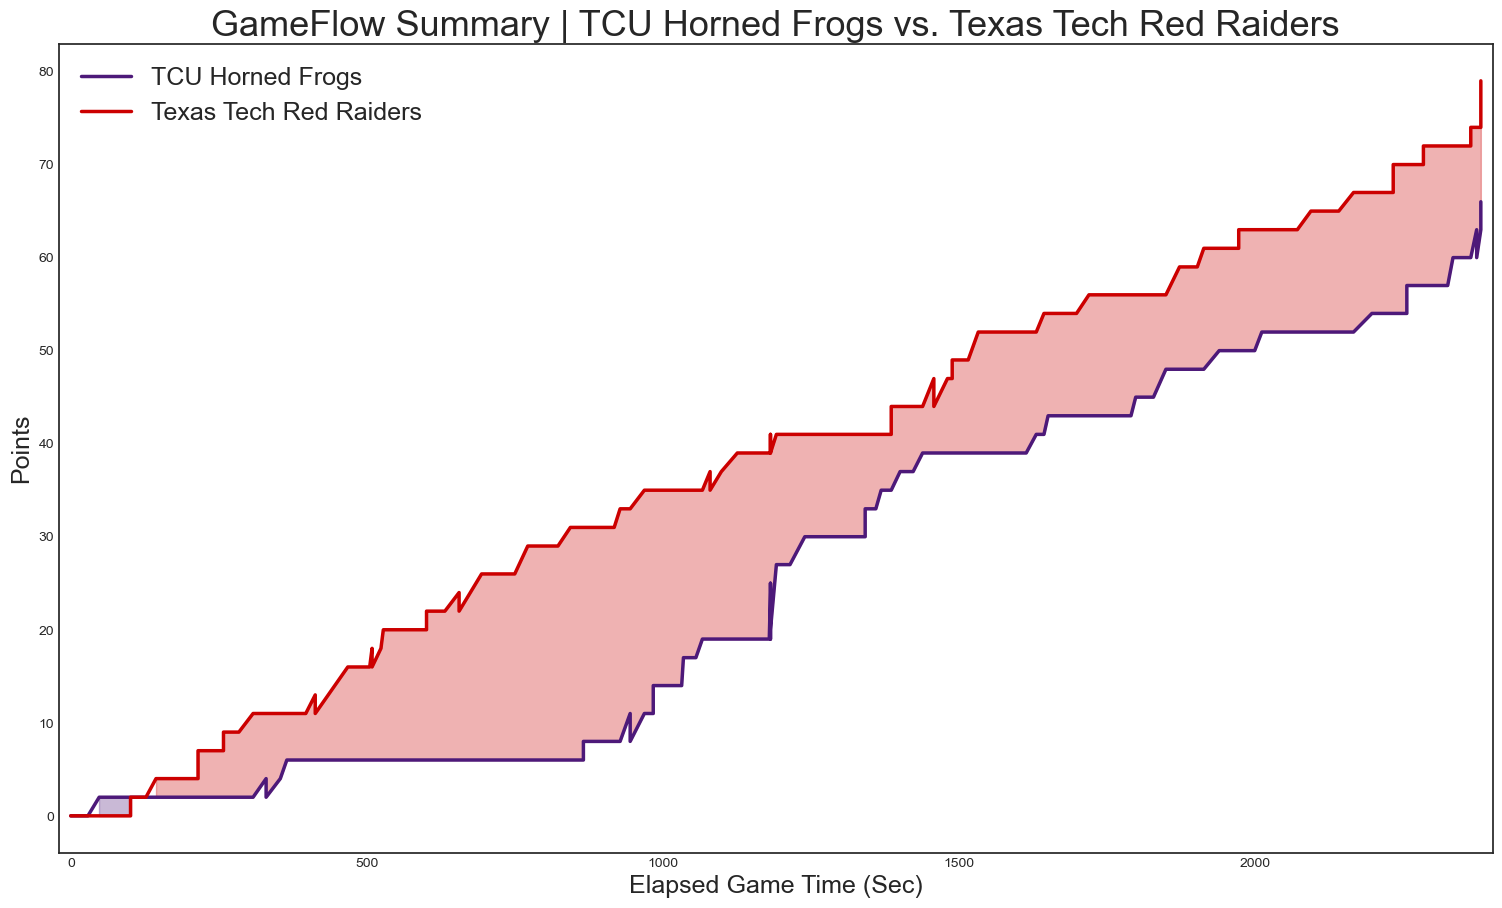

In [74]:
plot_game_flow_chart(df,game_id,filename+'_GameFlow_Graph',shade=True)

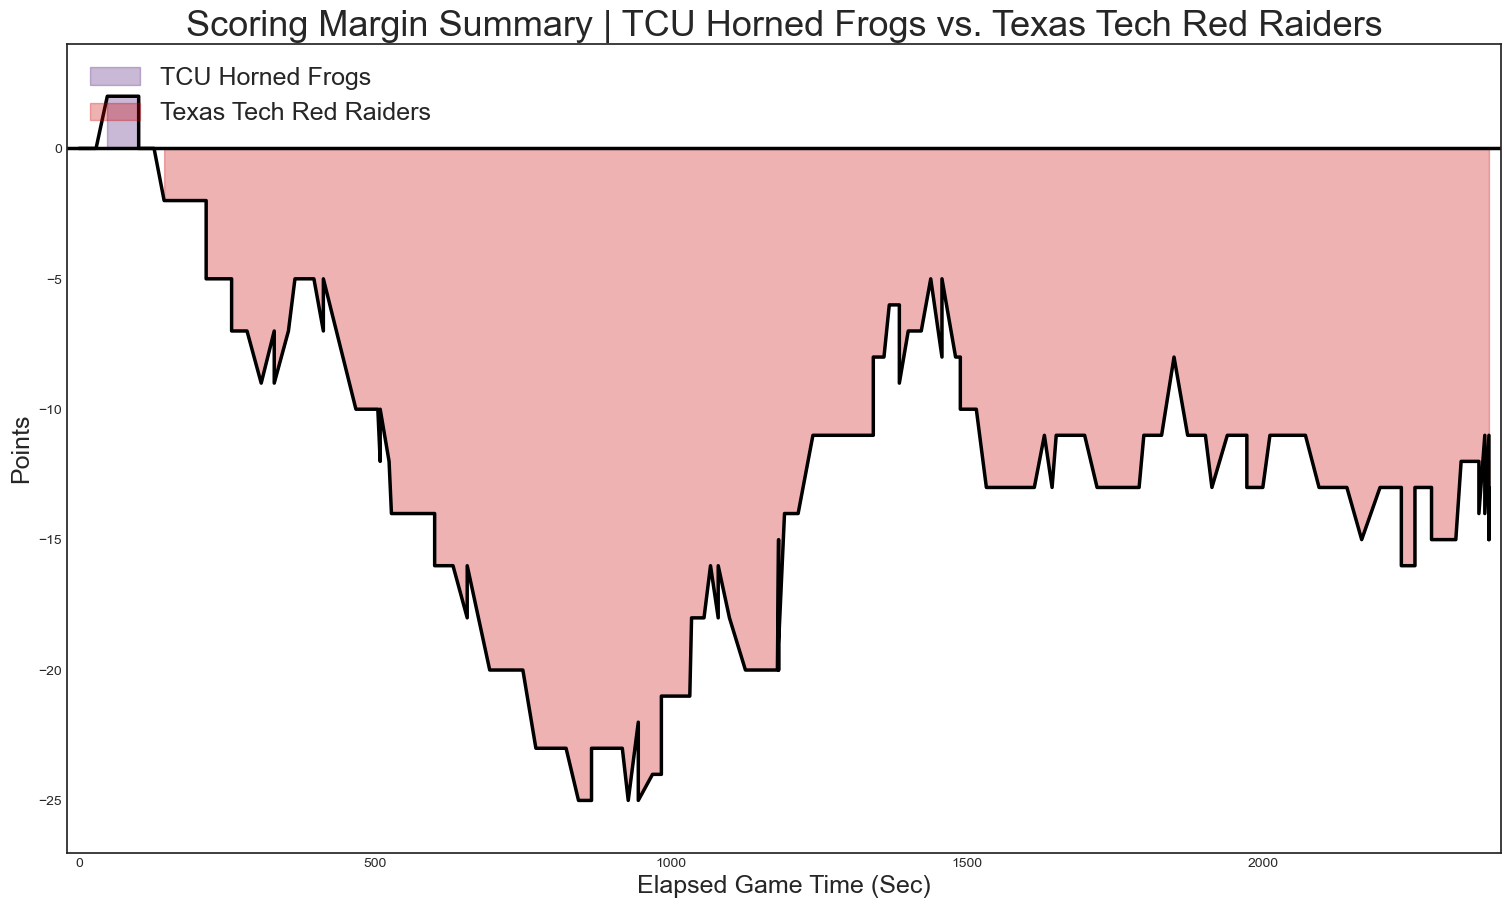

In [75]:
plot_net_score_chart(df,game_id,filename+'_NetScore_Graph',shade=True)

298
298


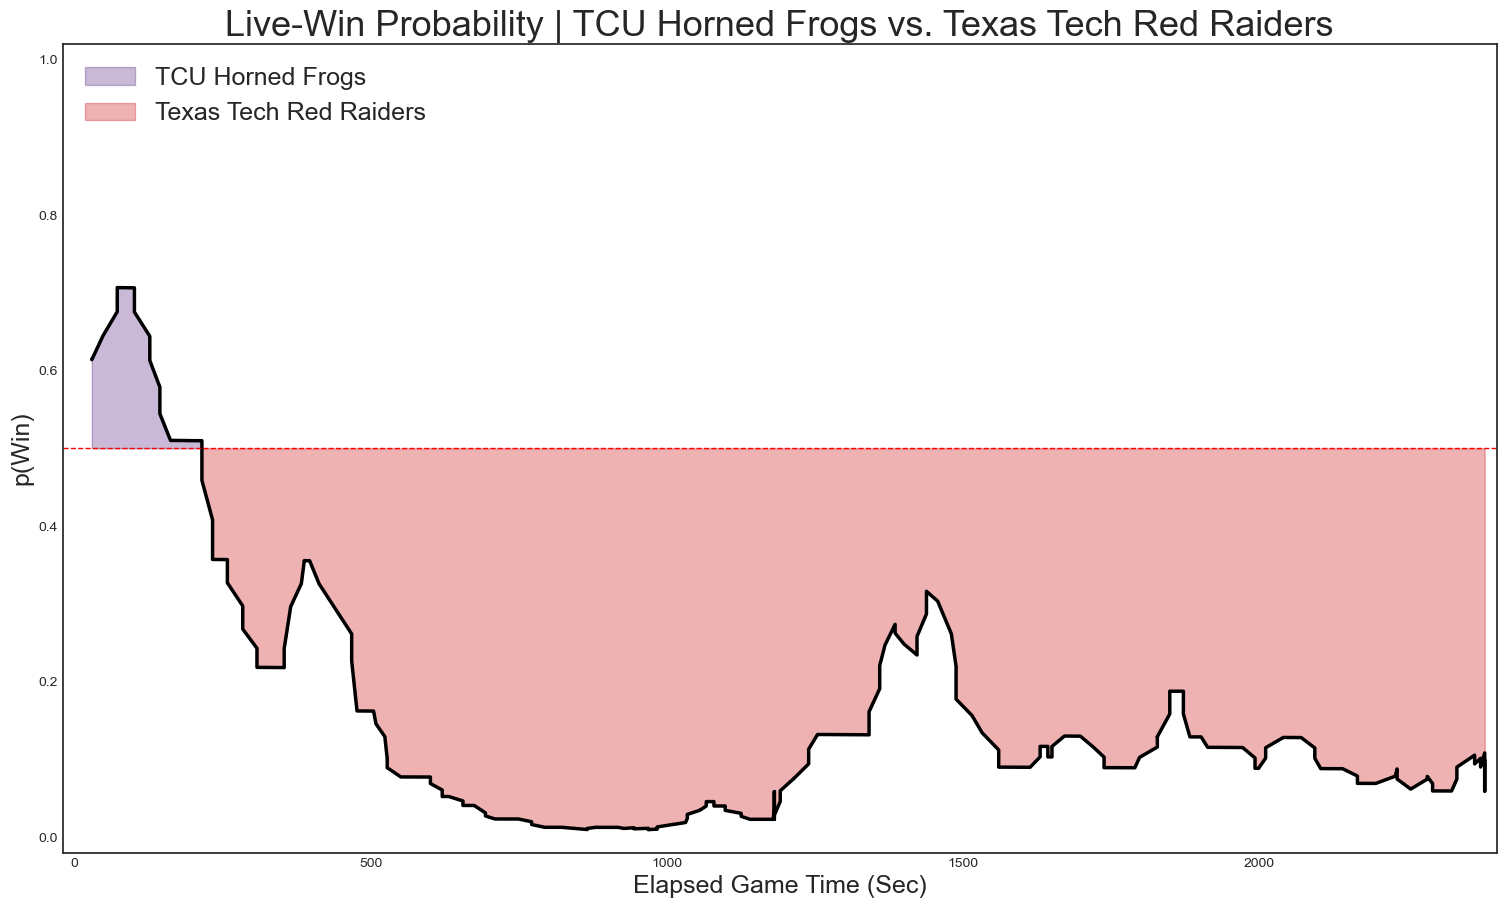

In [21]:
plot_win_prob_chart(df,game_id,filename+'_WinProbability_Graph',shade=True)